In [47]:
import json
from os.path import join

data_path = join("data", "output.json")


with open(data_path, "r", encoding="utf-8") as f:
    data = json.load(f)
    

texts = [d["text"] for d in data]



# hur lång är varje text? 
# hur långa är meningarna i varje text? 
# hur många characters är varje text?
# hur stort är vocab size?
# kör ner på all data 





In [48]:
!pip install matplotlib
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 573.4 kB/s eta 0:00:23
     --------------------------------------- 0.1/12.8 MB 774.0 kB/s eta 0:00:17
      -------------------------------------- 0.2/12.8 MB 841.6 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.8 MB 841.6 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.8 MB 752.5 kB/s eta 0:00:17
      -------------------------------------- 0.2/12.8 MB 752.5 kB/s eta 0:00:17
      -------------------------------------- 0.3/12.8 MB 710.0 kB/s eta 0:00:18
      -------------------------------------- 0.3/12.8 MB 655.2 kB/s eta 0:00:20
      -------------------------------------- 0.3/12.8 MB 655.5 k

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


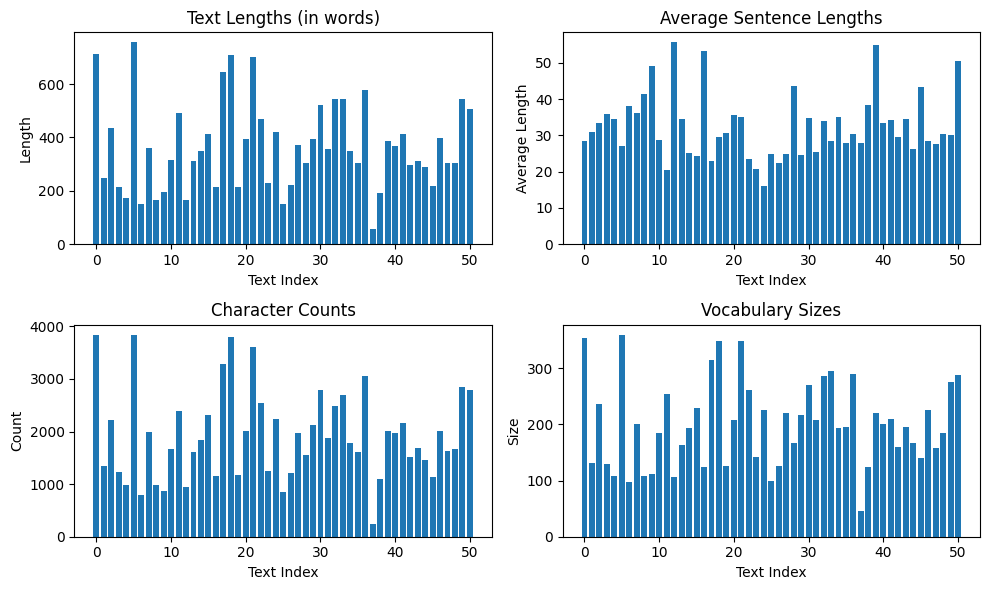

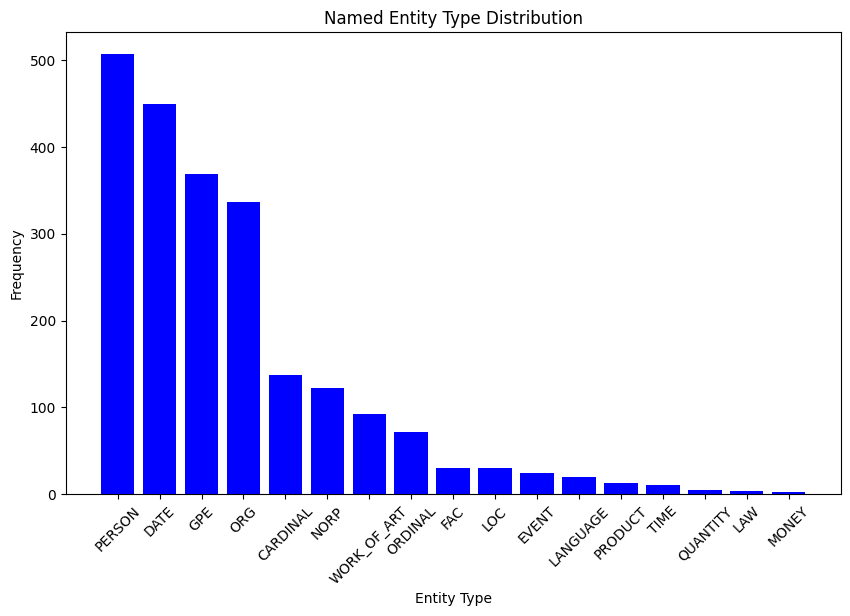

In [73]:
import matplotlib.pyplot as plt
import nltk
from collections import Counter
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize

# Example texts list

nlp = spacy.load("en_core_web_sm")

nltk.download("punkt")

text_lengths = []
sentence_lengths = []
char_counts = []
vocab_sizes = []
entity_types = []

for text in texts:
    # Word tokenization and counting
    words = word_tokenize(text)
    text_lengths.append(len(words))

    # Sentence tokenization and counting words in each sentence
    sentences = sent_tokenize(text)
    sentence_lengths.append([len(word_tokenize(sentence)) for sentence in sentences])

    # Character count
    char_counts.append(len(text))

    # Vocabulary size (unique word count)
    vocab_sizes.append(len(set(words)))

    # Named Entity Recognition using spaCy
    doc = nlp(text)
    entity_types.extend([ent.label_ for ent in doc.ents])

# Visualization 1: Text Lengths (in words)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.bar(range(len(text_lengths)), text_lengths)
plt.title('Text Lengths (in words)')
plt.xlabel('Text Index')
plt.ylabel('Length')

# Visualization 2: Average Sentence Lengths
avg_sentence_lengths = [sum(lengths) / len(lengths) if lengths else 0 for lengths in sentence_lengths]
plt.subplot(2, 2, 2)
plt.bar(range(len(avg_sentence_lengths)), avg_sentence_lengths)
plt.title('Average Sentence Lengths')
plt.xlabel('Text Index')
plt.ylabel('Average Length')

# Visualization 3: Character Counts
plt.subplot(2, 2, 3)
plt.bar(range(len(char_counts)), char_counts)
plt.title('Character Counts')
plt.xlabel('Text Index')
plt.ylabel('Count')

# Visualization 4: Vocabulary Sizes
plt.subplot(2, 2, 4)
plt.bar(range(len(vocab_sizes)), vocab_sizes)
plt.title('Vocabulary Sizes')
plt.xlabel('Text Index')
plt.ylabel('Size')

# Adjust layout
plt.tight_layout()
plt.show()

# Visualization 5: NER Entity Distribution

entity_counts = Counter(entity_types)

# Sort entities by frequency in descending order
sorted_entity_counts = {k: v for k, v in sorted(entity_counts.items(), key=lambda item: item[1], reverse=True)}
labels, values = zip(*sorted_entity_counts.items())

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='blue')
plt.title('Named Entity Type Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
#entity_counts = dict(Counter(entities).most_common(20))
#plt.figure(figsize=(10, 6))
#plt.bar(entity_counts.keys(), entity_counts.values())
#plt.title('Named Entity Frequency')
#plt.xlabel('Entity')
#plt.ylabel('Frequency')
#plt.xticks(rotation=45)
#plt.show()



In [74]:
print(texts)

['In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Relativity Theory, also published in 1905, changed the world. After the rise of the Nazi party, Einstein made Princeton his permanent home, becoming a U.S. citizen in 1940. Einstein, a pacifist during World War I, stayed a firm proponent of social justice and responsibility. He chaired the Emergency Committee of Atomic Scientists, which organized to alert the public to the dangers of atomic warfare.At a symposium, he advised: "In their struggle for the ethical good, teachers of religion must have the stature to give up the doctrine of a personal God, that is, give up that source of fear and hope which in the past placed such vast power in the hands of priests. In their labors they will have to avail themselves of those forces which are 

In [75]:
print(entity_type_counts)

Counter({'PERSON': 507, 'DATE': 450, 'GPE': 369, 'ORG': 337, 'CARDINAL': 137, 'NORP': 122, 'WORK_OF_ART': 92, 'ORDINAL': 72, 'FAC': 30, 'LOC': 30, 'EVENT': 24, 'LANGUAGE': 20, 'PRODUCT': 13, 'TIME': 10, 'QUANTITY': 5, 'LAW': 4, 'MONEY': 2})
